In [2]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 1.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


SEPHORA DATASET EXPLORATORY DATA ANALYSIS

DATASET OVERVIEW
--------------------------------------------------
PRODUCTS DATASET:
   Number of records: 8,494
   Number of columns: 27
   Column names: ['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']
   Memory usage: 13.62 MB
REVIEWS DATASET:
   Number of records: 1,094,411
   Number of columns: 19
   Column names: ['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', '

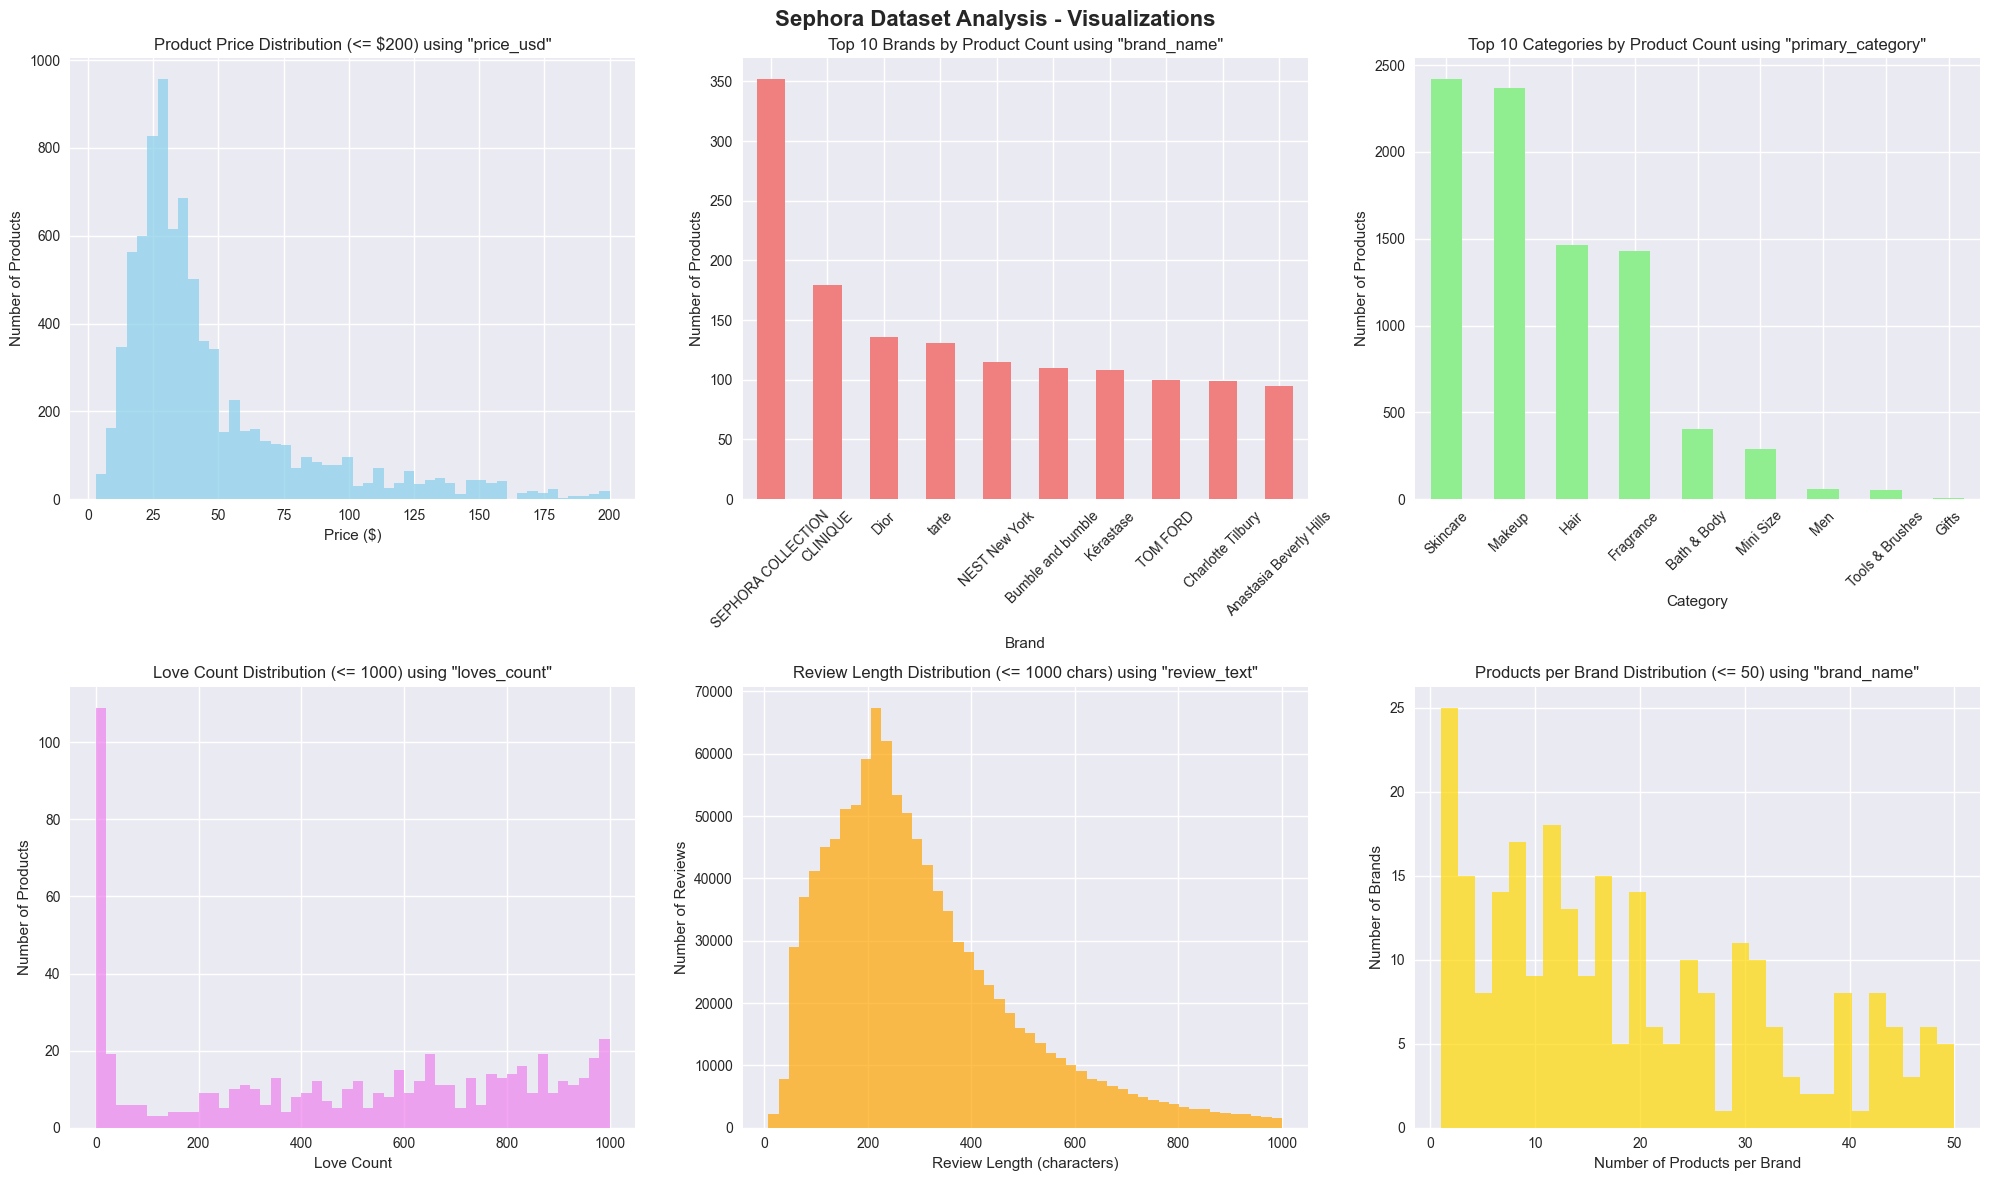


EDA COMPLETED SUCCESSFULLY!
SAMPLE PRODUCTS DATA (first 3 rows):
  product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_and_analyze_datasets():
    try:
        products_df = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/product_info.csv')
        
        reviews_1 = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/reviews_0-250.csv')
        reviews_2 = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/reviews_250-500.csv')
        reviews_3 = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/reviews_500-750.csv')
        reviews_4 = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/reviews_750-1250.csv')
        reviews_5 = pd.read_csv('/Users/harshithatalapaneni/Documents/7th_Sem/nlp/Cosmetics-Recommender/archive/reviews_1250-end.csv')
        reviews_df = pd.concat([reviews_1, reviews_2, reviews_3, reviews_4, reviews_5], ignore_index=True)
        
    except Exception as e:
        print(f"Error loading files: {e}")
        try:
            products_df = pd.read_csv('archive/product_info.csv')
            reviews_1 = pd.read_csv('archive/reviews_0-250.csv')
            reviews_2 = pd.read_csv('archive/reviews_250-500.csv')
            reviews_df = pd.concat([reviews_1, reviews_2], ignore_index=True)
        except Exception as e2:
            print(f"Alternative path also failed: {e2}")
            return None, None
    
    print("=" * 80)
    print("SEPHORA DATASET EXPLORATORY DATA ANALYSIS")
    print("=" * 80)
    
    return products_df, reviews_df

def basic_dataset_info(products_df, reviews_df):
    print("\nDATASET OVERVIEW")
    print("-" * 50)
    
    print(f"PRODUCTS DATASET:")
    print(f"   Number of records: {len(products_df):,}")
    print(f"   Number of columns: {len(products_df.columns)}")
    print(f"   Column names: {list(products_df.columns)}")
    print(f"   Memory usage: {products_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"REVIEWS DATASET:")
    print(f"   Number of records: {len(reviews_df):,}")
    print(f"   Number of columns: {len(reviews_df.columns)}")
    print(f"   Column names: {list(reviews_df.columns)}")
    print(f"   Memory usage: {reviews_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"DATA TYPES - PRODUCTS:")
    print(products_df.dtypes)
    print(f"DATA TYPES - REVIEWS:")
    print(reviews_df.dtypes)

def products_eda(products_df):
    print("\n" + "=" * 60)
    print("PRODUCTS DATASET ANALYSIS")
    print("=" * 60)
    
    print(f"BASIC STATISTICS:")
    print(f"   Total products: {len(products_df):,}")
    
    available_columns = products_df.columns.tolist()
    print(f"   Available columns: {available_columns}")
    
    price_col = None
    for col in ['price', 'price_usd', 'current_price', 'retail_price']:
        if col in products_df.columns:
            price_col = col
            break
    
    if price_col:
        print(f"PRICE ANALYSIS (using '{price_col}'):")
        print(f"   Price range: ${products_df[price_col].min():.2f} - ${products_df[price_col].max():.2f}")
        print(f"   Average price: ${products_df[price_col].mean():.2f}")
        print(f"   Median price: ${products_df[price_col].median():.2f}")
        print(f"   Products with price: {products_df[price_col].notna().sum():,}")
    
    love_col = None
    for col in ['love_count', 'loves_count', 'favorite_count']:
        if col in products_df.columns:
            love_col = col
            break
    
    if love_col:
        print(f"LOVE COUNT ANALYSIS (using '{love_col}'):")
        print(f"   Total loves: {products_df[love_col].sum():,}")
        print(f"   Average loves per product: {products_df[love_col].mean():.1f}")
    
    category_col = None
    for col in ['category', 'primary_category', 'category_name']:
        if col in products_df.columns:
            category_col = col
            break
    
    if category_col:
        print(f"CATEGORY ANALYSIS (using '{category_col}'):")
        print(f"   Unique categories: {products_df[category_col].nunique()}")
        print(f"   Top 10 categories:")
        top_categories = products_df[category_col].value_counts().head(10)
        for category, count in top_categories.items():
            print(f"     - {category}: {count:,} products")
    
    brand_col = None
    for col in ['brand_name', 'brand', 'brand_name']:
        if col in products_df.columns:
            brand_col = col
            break
    
    if brand_col:
        print(f"BRAND ANALYSIS (using '{brand_col}'):")
        print(f"   Unique brands: {products_df[brand_col].nunique()}")
        print(f"   Top 15 brands:")
        top_brands = products_df[brand_col].value_counts().head(15)
        for brand, count in top_brands.items():
            print(f"     - {brand}: {count:,} products")
    
    if 'product_name' in products_df.columns:
        print(f"PRODUCT NAME ANALYSIS:")
        print(f"   Unique product names: {products_df['product_name'].nunique()}")
        print(f"   Sample product names:")
        for name in products_df['product_name'].head(5):
            print(f"     - {name}")

def reviews_eda(reviews_df, products_df):
    print("\n" + "=" * 60)
    print("REVIEWS DATASET ANALYSIS")
    print("=" * 60)
    
    print(f"BASIC STATISTICS:")
    print(f"   Total reviews: {len(reviews_df):,}")
    
    available_columns = reviews_df.columns.tolist()
    print(f"   Available columns: {available_columns}")
    
    text_col = None
    for col in ['review_text', 'text', 'review_content', 'content']:
        if col in reviews_df.columns:
            text_col = col
            break
    
    if text_col:
        print(f"REVIEW TEXT ANALYSIS (using '{text_col}'):")
        reviews_df['review_length'] = reviews_df[text_col].str.len()
        print(f"   Average review length: {reviews_df['review_length'].mean():.1f} characters")
        print(f"   Reviews with text: {reviews_df[text_col].notna().sum():,}")
    
    if 'author_id' in reviews_df.columns:
        print(f"AUTHOR ANALYSIS:")
        print(f"   Unique reviewers: {reviews_df['author_id'].nunique():,}")
    
    if 'product_id' in reviews_df.columns:
        print(f"PRODUCT REVIEW ANALYSIS:")
        print(f"   Unique products reviewed: {reviews_df['product_id'].nunique():,}")
        reviews_per_product = reviews_df['product_id'].value_counts()
        print(f"   Average reviews per product: {reviews_per_product.mean():.1f}")
        print(f"   Most reviewed product: {reviews_per_product.max():,} reviews")
        print(f"   Least reviewed product: {reviews_per_product.min():,} reviews")

def create_visualizations(products_df, reviews_df):
    print("\n" + "=" * 60)
    print("CREATING VISUALIZATIONS")
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Sephora Dataset Analysis - Visualizations', fontsize=16, fontweight='bold')
    
    price_col = None
    for col in ['price', 'price_usd', 'current_price', 'retail_price']:
        if col in products_df.columns:
            price_col = col
            break
    
    if price_col:
        prices = products_df[price_col].dropna()
        if len(prices) > 0:
            axes[0,0].hist(prices[prices <= 200], bins=50, alpha=0.7, color='skyblue')
            axes[0,0].set_title(f'Product Price Distribution (<= $200) using "{price_col}"')
            axes[0,0].set_xlabel('Price ($)')
            axes[0,0].set_ylabel('Number of Products')
    
    brand_col = None
    for col in ['brand_name', 'brand', 'brand_name']:
        if col in products_df.columns:
            brand_col = col
            break
    
    if brand_col:
        top_brands = products_df[brand_col].value_counts().head(10)
        top_brands.plot(kind='bar', ax=axes[0,1], color='lightcoral')
        axes[0,1].set_title(f'Top 10 Brands by Product Count using "{brand_col}"')
        axes[0,1].set_xlabel('Brand')
        axes[0,1].set_ylabel('Number of Products')
        axes[0,1].tick_params(axis='x', rotation=45)
    
    category_col = None
    for col in ['category', 'primary_category', 'category_name']:
        if col in products_df.columns:
            category_col = col
            break
    
    if category_col:
        top_categories = products_df[category_col].value_counts().head(10)
        top_categories.plot(kind='bar', ax=axes[0,2], color='lightgreen')
        axes[0,2].set_title(f'Top 10 Categories by Product Count using "{category_col}"')
        axes[0,2].set_xlabel('Category')
        axes[0,2].set_ylabel('Number of Products')
        axes[0,2].tick_params(axis='x', rotation=45)
    
    love_col = None
    for col in ['love_count', 'loves_count', 'favorite_count']:
        if col in products_df.columns:
            love_col = col
            break
    
    if love_col:
        loves = products_df[love_col].dropna()
        if len(loves) > 0:
            axes[1,0].hist(loves[loves <= 1000], bins=50, alpha=0.7, color='violet')
            axes[1,0].set_title(f'Love Count Distribution (<= 1000) using "{love_col}"')
            axes[1,0].set_xlabel('Love Count')
            axes[1,0].set_ylabel('Number of Products')
    
    text_col = None
    for col in ['review_text', 'text', 'review_content', 'content']:
        if col in reviews_df.columns:
            text_col = col
            break
    
    if text_col:
        reviews_df['review_length'] = reviews_df[text_col].str.len()
        review_lengths = reviews_df['review_length'].dropna()
        if len(review_lengths) > 0:
            axes[1,1].hist(review_lengths[review_lengths <= 1000], bins=50, alpha=0.7, color='orange')
            axes[1,1].set_title(f'Review Length Distribution (<= 1000 chars) using "{text_col}"')
            axes[1,1].set_xlabel('Review Length (characters)')
            axes[1,1].set_ylabel('Number of Reviews')
    
    brand_col = None
    for col in ['brand_name', 'brand', 'brand_name']:
        if col in products_df.columns:
            brand_col = col
            break
    
    if brand_col:
        brand_counts = products_df[brand_col].value_counts()
        axes[1,2].hist(brand_counts[brand_counts <= 50], bins=30, alpha=0.7, color='gold')
        axes[1,2].set_title(f'Products per Brand Distribution (<= 50) using "{brand_col}"')
        axes[1,2].set_xlabel('Number of Products per Brand')
        axes[1,2].set_ylabel('Number of Brands')
    
    plt.tight_layout()
    plt.show()

def missing_values_analysis(products_df, reviews_df):
    print("\n" + "=" * 60)
    print("MISSING VALUES ANALYSIS")
    print("=" * 60)
    
    print(f"PRODUCTS DATASET MISSING VALUES:")
    products_missing = products_df.isnull().sum()
    for col, missing in products_missing.items():
        if missing > 0:
            percentage = (missing / len(products_df)) * 100
            print(f"   {col}: {missing:,} missing ({percentage:.1f}%)")
    
    print(f"REVIEWS DATASET MISSING VALUES:")
    reviews_missing = reviews_df.isnull().sum()
    for col, missing in reviews_missing.items():
        if missing > 0:
            percentage = (missing / len(reviews_df)) * 100
            print(f"   {col}: {missing:,} missing ({percentage:.1f}%)")

def advanced_analysis(products_df, reviews_df):
    print("\n" + "=" * 60)
    print("ADVANCED ANALYSIS")
    print("=" * 60)
    
    price_col = None
    love_col = None
    
    for col in ['price', 'price_usd', 'current_price', 'retail_price']:
        if col in products_df.columns:
            price_col = col
            break
    
    for col in ['love_count', 'loves_count', 'favorite_count']:
        if col in products_df.columns:
            love_col = col
            break
    
    if price_col and love_col:
        correlation = products_df[[price_col, love_col]].corr().iloc[0,1]
        print(f"{price_col} vs {love_col} Correlation: {correlation:.3f}")
    
    if 'product_id' in reviews_df.columns:
        product_review_counts = reviews_df['product_id'].value_counts()
        print(f"TOP 5 MOST REVIEWED PRODUCTS:")
        top_reviewed = product_review_counts.head()
        for i, (product_id, count) in enumerate(top_reviewed.items(), 1):
            product_name = "Unknown"
            if 'product_name' in products_df.columns and 'product_id' in products_df.columns:
                matching_products = products_df[products_df['product_id'] == product_id]['product_name']
                if len(matching_products) > 0:
                    product_name = matching_products.values[0]
            print(f"   {i}. Product ID {product_id}: {count:,} reviews")
            print(f"      Name: {product_name}")

def main():
    products_df, reviews_df = load_and_analyze_datasets()
    
    if products_df is None or reviews_df is None:
        print("Failed to load datasets. Please check file paths.")
        return None, None
    
    basic_dataset_info(products_df, reviews_df)
    products_eda(products_df)
    reviews_eda(reviews_df, products_df)
    missing_values_analysis(products_df, reviews_df)
    advanced_analysis(products_df, reviews_df)
    
    create_visualizations(products_df, reviews_df)
    
    print("\n" + "=" * 80)
    print("EDA COMPLETED SUCCESSFULLY!")
    print("=" * 80)
    
    return products_df, reviews_df

if __name__ == "__main__":
    products_df, reviews_df = main()
    
    if products_df is not None and reviews_df is not None:
        print(f"SAMPLE PRODUCTS DATA (first 3 rows):")
        print(products_df.head(3))
        
        print(f"SAMPLE REVIEWS DATA (first 3 rows):")
        print(reviews_df.head(3))
        
        print(f"PRODUCTS DATASET SHAPE: {products_df.shape}")
        print(f"REVIEWS DATASET SHAPE: {reviews_df.shape}")

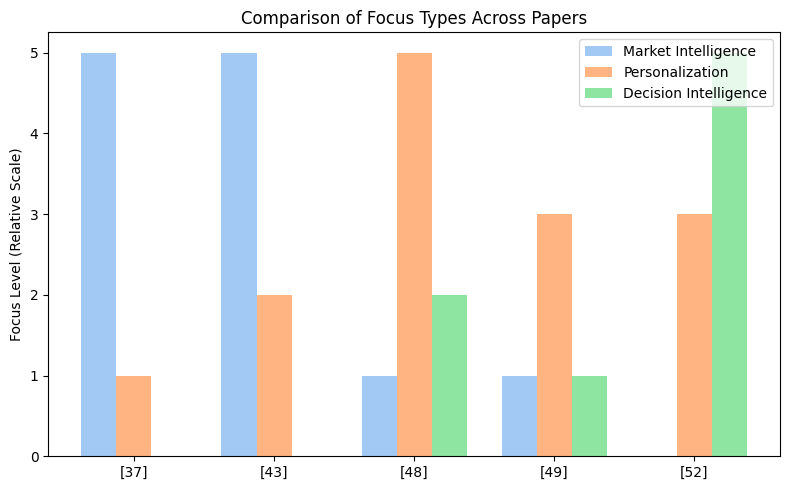

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
papers = ['[37]', '[43]', '[48]', '[49]', '[52]']
market = [5, 5, 1, 1, 0]
personal = [1, 2, 5, 3, 3]
decision = [0, 0, 2, 1, 5]

x = np.arange(len(papers))
width = 0.25

plt.figure(figsize=(8,5))

# Light pastel aesthetic colors
plt.bar(x - width, market, width, label='Market Intelligence', color='#A1C9F4')  # soft light blue
plt.bar(x, personal, width, label='Personalization', color='#FFB482')            # light peach/orange
plt.bar(x + width, decision, width, label='Decision Intelligence', color='#8DE5A1')  # mint green

plt.xticks(x, papers)
plt.ylabel('Focus Level (Relative Scale)')
plt.title('Comparison of Focus Types Across Papers')
plt.legend()

plt.tight_layout()
plt.show()
